# Analysing Purchasing Intent For Online Shoppers

**In this dataset l will be analysing the purchasing intent of online shoppers who come to the website.l will be performing univariate and bivariate analysis on the data as well as analysing linear relationships between the various features in the dataset.The dataset contains information about the number of a certain type of page a visitor visited , how low long they were there as well as weather they ended up buying or not.The detailed dictionary for the dataset is available in the data-dictionary.md file**

In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import the dataset
df = pd.read_csv("online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
#Check the meta data of the data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
#check for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Observations**
There are 12 330 rows and 18 columns
There are no null values and the dataset is clean

## Exploratory Data Analysis

### Univariate Analysis
- In this section l will be analysing the individual features in the dataset to find out any interesting pattern in thier distribution or variability
**Features To Explore**
- Revenue
- Weekend
- Visitor Type
- Traffic Type
- Month
- SpecialDay
- Administrative , Administrative Duration, Informational, Informational Duration, InformationalProductRelated, ProductRelated Duration
- Bounce-Rates, Exit Rates and Page Values

In [76]:
#Function to create a countplot to sea the distribution of categorical variables
def calculate_plot3(x,y,z):
    colors = ["#FF7F50", "#87CEFA", "#32CD32"]
    fig , ax = plt.subplots(1,3 , figsize=(10,5))
    sb.countplot(data=df,x=x, ax= ax[0] , palette=colors)
    sb.countplot(data=df,x=y, ax= ax[1], palette=colors)
    sb.displot(data=df,x=z, ax= ax[2], palette=colors)
    ax[0].set_title(f"{x} Distribution")
    ax[1].set_title(f"{y} Distribution")
    ax[2].set_title(f"{z} Distribution")
    p_x = df[x].value_counts(normalize=True)*100
    p_y = df[y].value_counts(normalize=True)*100
    p_z = df[z].value_counts(normalize=True)*100
    print(f"The most highest value of {x} is {p_x.idxmax()} which has a percentage of {round(p_x.max(),2)}")
    print(f"The most highest value of {y} is {p_y.idxmax()} which has a percentage of {round(p_y.max(),2)}")
    print(f"The most highest value of {z} is {p_z.idxmax()} which has a percentage of {round(p_z.max(),2)}")

In [64]:
#create a function to calculate the percentage of the mode category
def highest_value_calculator(*args):
    for arg in args:
        p_y = df[arg].value_counts(normalize=True)*100
        print(f"The most highest value of {arg} is {p_y.idxmax()} which has a percentage of {round(p_y.max(),2)}")


The most highest value of Revenue is False which has a percentage of 84.53
The most highest value of Weekend is False which has a percentage of 76.74
The most highest value of VisitorType is Returning_Visitor which has a percentage of 85.57
The most highest value of TrafficType is 2 which has a percentage of 31.74
The most highest value of Region is 1 which has a percentage of 38.77
The most highest value of Month is May which has a percentage of 27.28


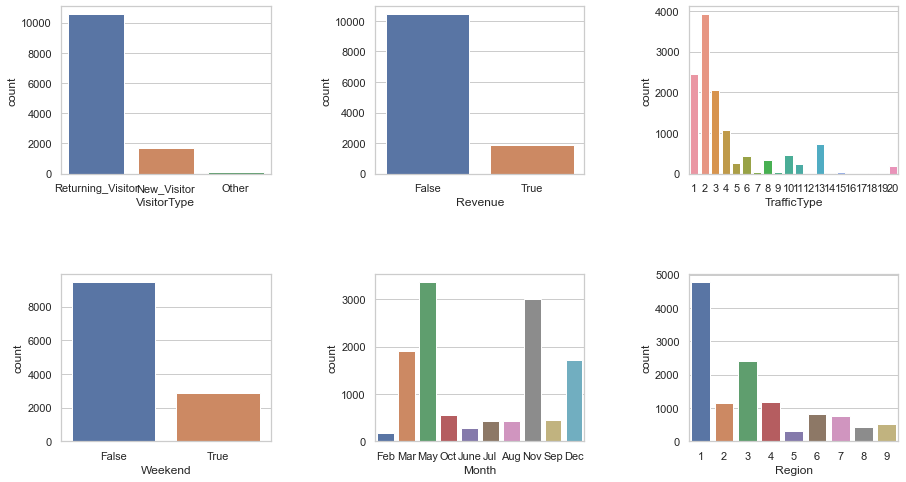

In [71]:
#plot the graphs to see the distribution the various variables
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sb.countplot(x="VisitorType",data=df, ax= axes[0][0])
sb.countplot(x="Revenue",data=df, ax= axes[0][1])
sb.countplot(x="TrafficType",data=df, ax= axes[0][2])
sb.countplot(x="Weekend",data=df, ax= axes[1][0])
sb.countplot(x="Month",data=df, ax= axes[1][1])
sb.countplot(x="Region",data=df, ax= axes[1][2])
highest_value_calculator("Revenue","Weekend","VisitorType","TrafficType","Region","Month")
plt.subplots_adjust(wspace=0.5,hspace=0.6);

**Observations**
Most of the visitors are returning visitors, making up about 86% of the visitor population
77% of the visitors visit during the weekend
Most visitors come through Traffic Type 1 , 2 and 3. With Type 2 being the most common one
We have a very low conversion rate of about 15%
The months of March , May , November and December have the highest number of visitors, with May have the overall highest visitor rate
Region 1 and 3  have the highest number of visitors, Region 1 has overall highest number of visitors

The most highest value of Administrative is 0 which has a percentage of 46.78
The most highest value of Informational is 0 which has a percentage of 78.66
The most highest value of ProductRelated is 1 which has a percentage of 5.04


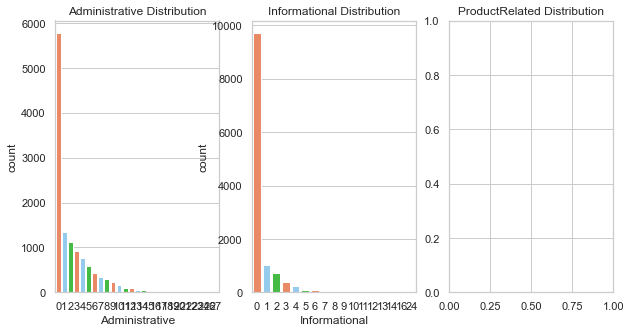

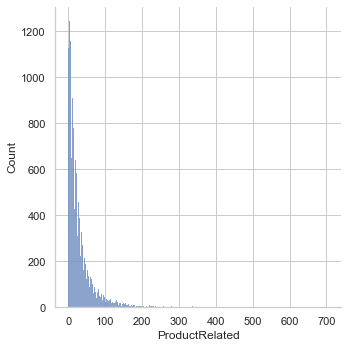

In [77]:
#Visualize the distribution of page views
calculate_plot3("Administrative","Informational","ProductRelated")

**Observations**
Most people dont view Administrative or Informational pages
The first product related pages have the most views

#### Bivariate Analysis

##### Revenue Vs Visitor Type

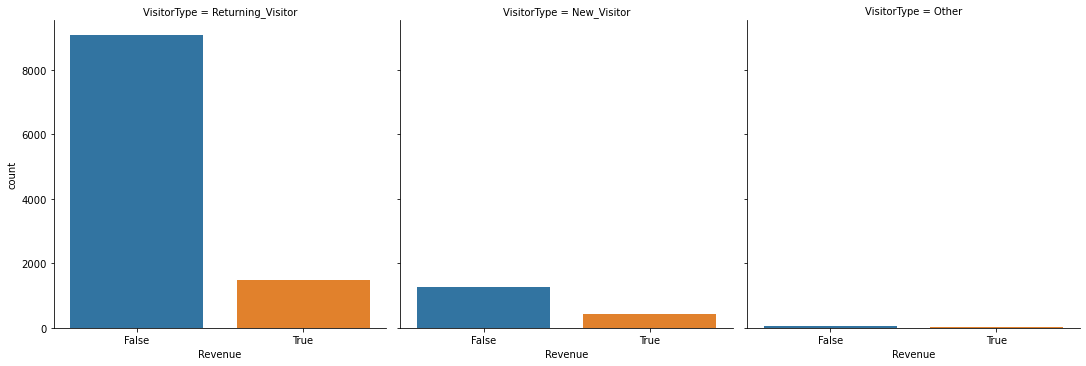

In [12]:
#Visualize the relationship between Revenue and Visitor Type
sb.catplot("Revenue",data=df,col="VisitorType",kind="count");

**Observation**
We have more revenue conversions for returning customers

##### Revenue Vs Traffic Type

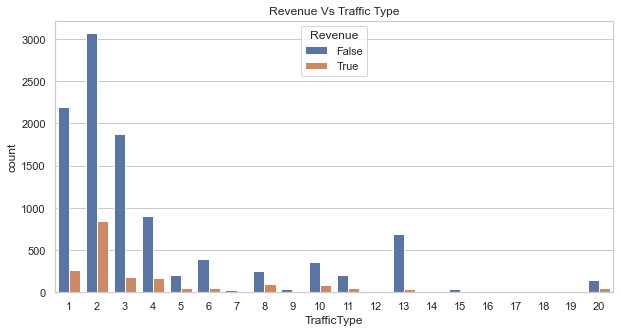

In [80]:
sb.countplot(x="TrafficType",hue="Revenue",data=df)
plt.title("Revenue Vs Traffic Type");


**Observations**
Traffic type 2 has the highest conversion rates.
The first 4 traffic types generally have relatively high conversion rates

#### Revenue Vs Month

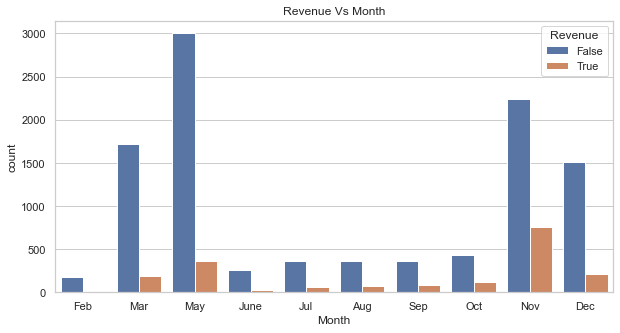

In [82]:
sb.countplot(x="Month",data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],hue="Revenue")
plt.title("Revenue Vs Month");

**Obseravtions**
The later months of the year tend to have relatively more revenue conversions than the early ones
November has the highest level of revenue conversions followed by May

#### Linear Relationships

Linear Relationships to explore :
Bounce rate versus exit rate
• Page value versus bounce rate
• Page value versus exit rate
• Impact of administration page views and administrative pageview duration
on revenue
• Impact of information page views and information pageview duration

##### Bounce Rate vs Exit Rate

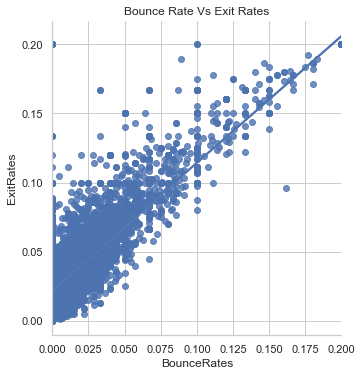

In [84]:
sb.set(style="whitegrid")
sb.lmplot(data=df,x="BounceRates",y="ExitRates")
plt.title("Bounce Rate Vs Exit Rates");

In [16]:
corr_b = round(np.corrcoef(df["BounceRates"],df["ExitRates"])[0][1],3)
corr_b

0.913

**Observation**
There is very strong positive correlation between bounce rates and exit rates, as bounce rate increases, exit rates also increase

##### Page Value Vs Bounce Rate

Correlation Coeffecient : -0.119


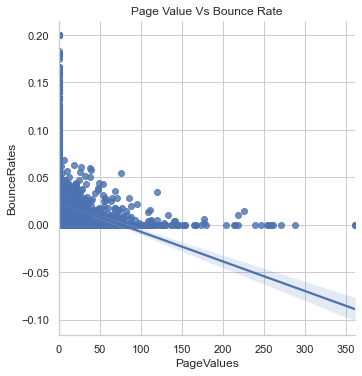

In [17]:
sb.lmplot(y="BounceRates",x="PageValues", data=df)
corr_page_value = round(np.corrcoef(df["BounceRates"],df["PageValues"])[0][1],3)
plt.title("Page Value Vs Bounce Rate")
print(f"Correlation Coeffecient : {corr_page_value}");

**Observations**
There is a negative correlation between page value and bounce rate
As page values increase bounce rate decreases

In [18]:
def generate_lmplot(x,y,hue=None):
     sb.lmplot(y=y,x=x, data=df, hue=hue)
     correlation = round(np.corrcoef(df[x],df[y])[0][1],3)
     plt.title(f"{x } Vs {y}")
     print(f"Correlation Coeffecient : {correlation}");

##### Page Value vs Exit Rate

Correlation Coeffecient : -0.174


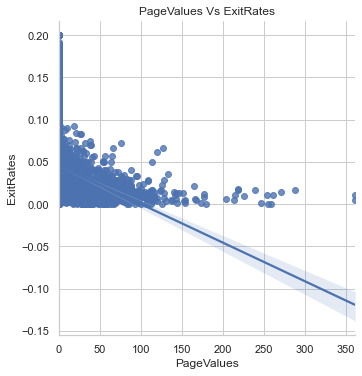

In [19]:
generate_lmplot("PageValues","ExitRates")

**Observations**
There is negative correlation between page value and exit rates.As the page value increases, exit rates decrease

#### Impact of Administration Page Views and Administrative Pageview Duration on Revenue

Correlation Coeffecient : 0.602


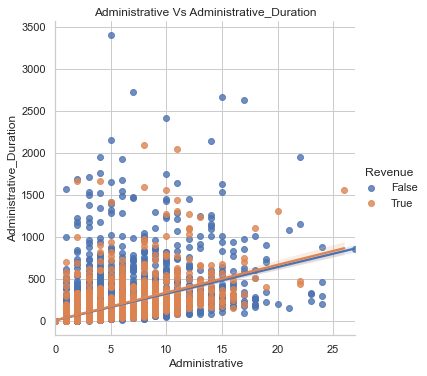

In [20]:
generate_lmplot("Administrative","Administrative_Duration",hue="Revenue")

**Observation**
There is a positive correlation between admnistrative page views and administartive page duration. As the number of admnistrative pages increases, the duration on adminstrative pages also increases.
There is a higher conversion rate for smaller adminstrative page views

#### Impact of Information Page Views and Information Pageview Duration on Revenue

Correlation Coeffecient : 0.619


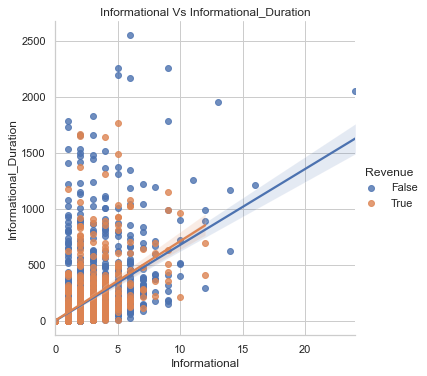

In [21]:
generate_lmplot("Informational","Informational_Duration",hue="Revenue")

**Observation**
There is a positive correlation between information page views and information page duration
As the number of page information pageviews increases so does the duration increases
However most of the conversion happens on information pages with smaller number of page views
Customers who have made online purchases visited fewer numbers of
informational pages. This implies that informational pageviews don't have much
effect on revenue generation.

### Clustering

##### Informational Duration Vs Bounce Rate

In [22]:
#selecting the columns
x = df.iloc[: , [3,6]].values
x

array([[0.        , 0.2       ],
       [0.        , 0.        ],
       [0.        , 0.2       ],
       ...,
       [0.        , 0.08333333],
       [0.        , 0.        ],
       [0.        , 0.        ]])

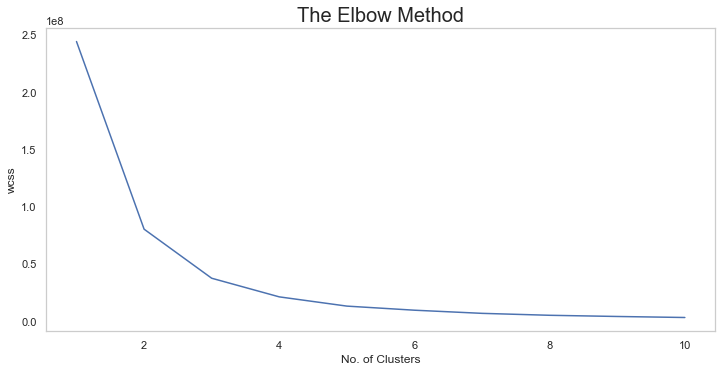

In [23]:
#Run the K-Means algorithm for different values of k
x = df.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


In [24]:
km = KMeans(n_clusters=2,init="k-means++",random_state=0,n_init=10,max_iter=300)
y_means = km.fit_predict(x)
y_means

array([1, 1, 1, ..., 1, 1, 1])

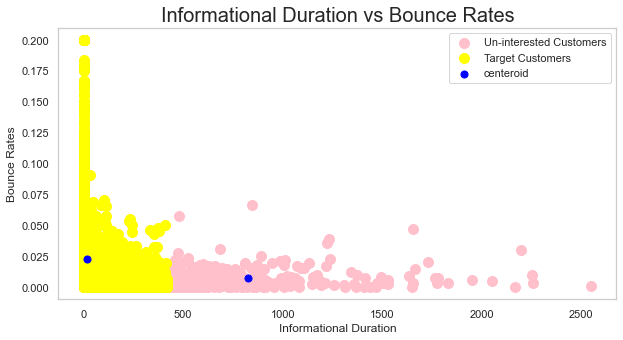

In [25]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend();

**Observation**
From the preceding graph, we can see that our target customers spend around
850-900 seconds on average on the Information page.

#### K-means Clustering for Informational Duration versus Exit Rate

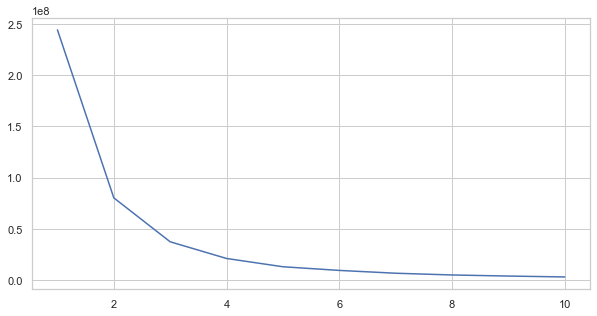

In [26]:
info_exit = df.iloc[:,[3,7]].values

wcss2 = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=0,algorithm="elkan")
    km.fit(x)
    labels = km.labels_
    wcss2.append(km.inertia_)

plt.plot(range(1,11),wcss2)

In [27]:
km = KMeans(n_clusters=2)
y_means2 = km.fit_predict(info_exit)

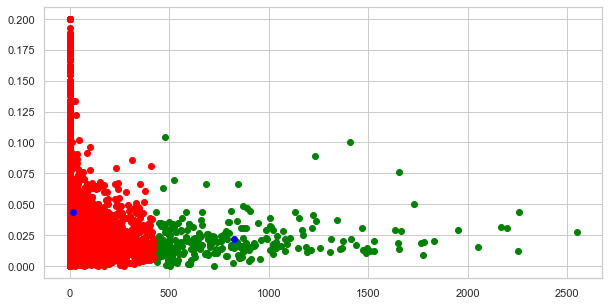

In [28]:
plt.scatter(info_exit[y_means==0,0],info_exit[y_means==0,1],c="green",label="Uninterested Customers")
plt.scatter(info_exit[y_means==1,0],info_exit[y_means==1,1],c="red",label="Target Customers")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="blue",label="Centroids");

In [29]:
def calculate_km(x,y):
    cols = df.iloc[:[x,y]].values
    wcss = []
    for i in range(1,11):
        km = KMeans(n_clusters=i,random_state=0)
        # labels = km.labels_
        km.fit(x)
        wcss.append(km.inertia_)
    plt.plot(range(1,11),wcss)
    plt.title("Elbow Method")
    plt.xlabel("No of clusters")


In [30]:
def get_scatters(n_clusters,data,xlabel,ylabel):
    km = KMeans(n_clusters=n_clusters)
    predicts = km.fit_predict(data)
    plt.scatter(data[predicts==0,0],data[predicts==0,1],c="green",label="Uninterested Customers")
    plt.scatter(data[predicts==1,0],data[predicts==1,1],c="yellow",label="Target Customers")
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="red",label="Centroids")
    plt.legend()
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.title(f"{xlabel} vs {ylabel}")

In [31]:
calculate_km(1,6)

TypeError: cannot do positional indexing on RangeIndex with these indexers [[1, 6]] of type list

In [ ]:
#### Administration Duration Vs Bounce Rate
x =df.iloc[:,[1,6]].values
wcss = []
for i in range(1,11):
        km = KMeans(n_clusters=i,random_state=0)
        # labels = km.labels_
        km.fit(x)
        wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of clusters");

In [ ]:
get_scatters(2,x,"Administrative Duration", "Bounce Rates")

In [ ]:
##### Administration Duration Vs Exit Rate
x = df.iloc[:, [1, 7]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    # labels = km.labels_
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("No of clusters");

In [ ]:
get_scatters(2,x,"Administration Duration","Exit Rates")

**Observations**
The conversion rates of new visitors are high compared to those of
returning customers.
• While the number of returning customers to the website is high, the conversion
rate is low compared to that of new customers.
• Pages with a high page value have a lower bounce rate. We should be talking
with our tech team to find ways to improve the page value of the web pages.